<a href="https://colab.research.google.com/github/asgutierrt/Introduction-to-IA/blob/main/unsupervised/no_supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# instalar e importar las librerias necesarias

# data
from sklearn import datasets
import numpy as np
from itertools import product

# plotting  
import matplotlib.pyplot as plt
#%pip install babyplots
from babyplots import Babyplot

In [9]:
# calcular diferentes normas
def norma (X,Y,norma='euclidea',cov_i=''):
    if norma=='coseno':
        num=np.matmul(X,Y)
        den=np.linalg.norm(X,ord=2)*np.linalg.norm(Y,ord=2)
        return 1-num/den
    if norma=='mahalanobis': return np.sqrt((X-Y).dot(cov_i).dot((X-Y).T))
    if norma=='manhattan': p=1
    if norma=='euclidea': p=2
    if norma=='Lp': p=p
    return (abs(X-Y)**p).sum()**(1/p)

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:,:]; y = iris.target
X = (X-np.min(X,axis=0))/(np.max(X,axis=0)-np.min(X,axis=0)) # normalizar
cov=np.cov(X,rowvar=False); cov_i=np.linalg.pinv(cov) # covarianza

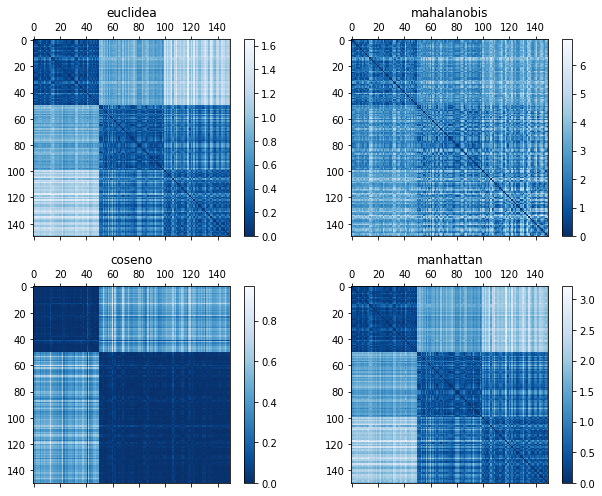

In [10]:
# plot distances
norms=['euclidea','mahalanobis','coseno','manhattan']

nrows=2; ncols=2
fig=plt.figure(figsize=(9,7))

for i in range(len(norms)):
    D=np.array([norma(x,y,norma=norms[i],cov_i=cov_i) for x in X for y in X]).reshape(len(X),-1)
    ax=plt.subplot(nrows,ncols,i+1)
    cax=ax.matshow(D, cmap=plt.cm.Blues.reversed())
    ax.set_title(norms[i])
    fig.colorbar(cax, ax=ax,fraction=0.046)
fig.tight_layout(); fig.savefig('distances_XX.png')

In [11]:
# naive clustering
n_groups=3
func = lambda x: x/((x.max()-x.min())/n_groups)
G=np.apply_along_axis(func, 0, D).astype(int)

In [27]:
# plot naive clustering

x_ref=0
bp = Babyplot()
bp.add_plot(X[:,:3].tolist(), "pointCloud", "categories", G[x_ref].tolist(), {"colorScale": "Paired"})
bp.save_as_html('groups.html') # abrir en el navegador

<IPython.core.display.Javascript object>

# grid

In [113]:
malla=lambda m, n_intervals: list(product(np.arange(n_intervals +1)*1/n_intervals,repeat=m))
n_grid_intervals= lambda N,m: int(np.exp(np.log(N)/m)-1)

m=len(X[0]); N=len(X)
grid=malla(m,n_grid_intervals(N,m))

<ipython-input-109-49a50ca51cea>:17: RuntimeWarning: invalid value encountered in double_scalars
  return 1-num/den


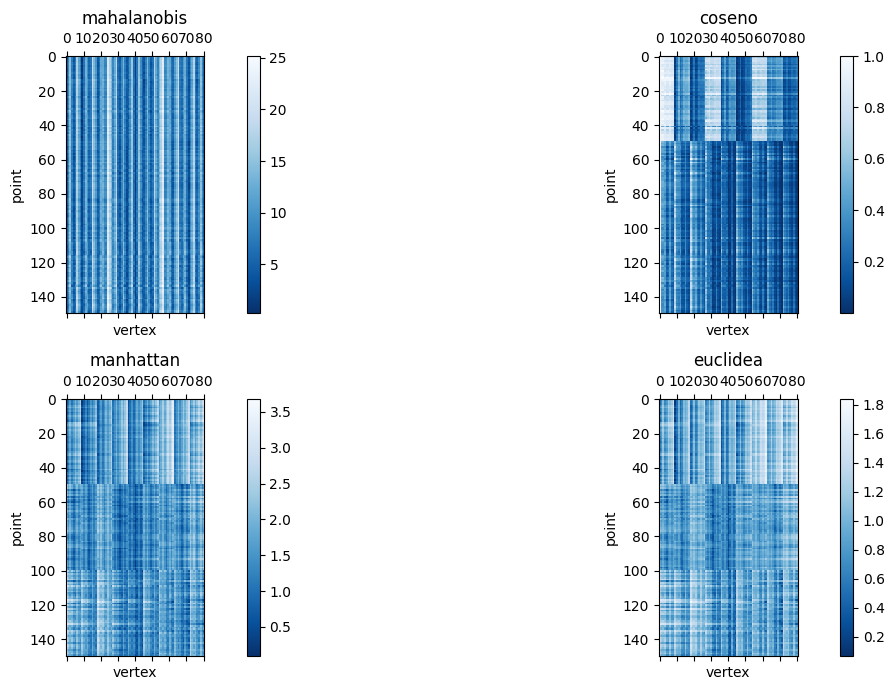

In [114]:
nrows=2; ncols=2
fig=plt.figure(figsize=(15,7))
norms=['mahalanobis','coseno','manhattan','euclidea']

for i in range(len(norms)):
  D=np.array([norma(x,y,norma=norms[i],cov_i=cov_i) for x in X for y in grid]).reshape(len(X),-1)
  ax=plt.subplot(nrows,ncols,i+1)
  cax=ax.matshow(D, cmap=plt.cm.Blues.reversed())
  ax.set_title(norms[i]); ax.set_xlabel('vertex'); ax.set_ylabel('point')
  fig.colorbar(cax, ax=ax,fraction=0.046)
plt.tight_layout(); fig.savefig('distances_vX.png')